In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
from IPython.display import display, Markdown
from scipy.optimize import fsolve
from sklearn.linear_model import LinearRegression

from common_plotting import read_data, plot, years, months, yearsFmt, add_thp
from common_analysis import analyse_grouped_ohms, PT385_eq, Trh, Rt, Rs23, add_dut_and_setting_group, interpolate_temp

plt.rcParams["figure.figsize"] = (20,10)
orig_max_rows = pd.options.display.max_rows
pd.options.display.max_rows = 100

In [14]:
thp_data, data = read_data(['ks3458a1-v2703-acv-sweep.csv', 'w4920-v2703-acv-sweep.csv', 'w4950-v2703-acv-sweep.csv'])
ks3458a1_data = data['ks3458a1-v2703-acv-sweep.csv']
w4920_data = data['w4920-v2703-acv-sweep.csv']
w4950_data = data['w4950-v2703-acv-sweep.csv']

In [18]:
ks3458a1_data

,dut,dut_setting,ag3458a_1_value,temp_1,last_acal_1,last_acal_1_cal72,3458a_1_function,ag3458a_1_range,temperature,pressure,humidity
datetime,,,,,,,,,,,
2023-01-30 13:46:53.185467,F510,10 V 2.4 kHz,10.000502,NaN,2023-01-30T13:42:16.017174,1.00074439E+00,NaN,10.0,31.292578,1019.516204,23.519234
2023-01-30 13:47:05.698851,F510,10 V 2.4 kHz,10.000515,NaN,2023-01-30T13:42:16.017174,1.00074439E+00,NaN,10.0,31.296484,1019.592072,23.438497
2023-01-30 13:47:17.778968,F510,10 V 2.4 kHz,10.000484,NaN,2023-01-30T13:42:16.017174,1.00074439E+00,NaN,10.0,31.300000,1019.481944,23.380549
2023-01-30 13:47:29.862271,F510,10 V 2.4 kHz,10.000518,NaN,2023-01-30T13:42:16.017174,1.00074439E+00,NaN,10.0,31.304297,1019.463929,23.357456
2023-01-30 13:47:41.941299,F510,10 V 2.4 kHz,10.000465,NaN,2023-01-30T13:42:16.017174,1.00074439E+00,NaN,10.0,31.299219,1019.573425,23.374596
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01 00:13:26.272044,Valhalla 2703,1 A 10 kHz,1.008324,NaN,2023-01-31T21:25:58.803034,keep,NaN,1.0,30.629297,1020.458644,24.760341
2023-02-01 00:13:38.343629,Valhalla 2703,1 A 10 kHz,1.008337,NaN,2023-01-31T21:25:58.803034,keep,NaN,1.0,30.639258,1020.545724,24.679468
2023-02-01 00:13:50.425611,Valhalla 2703,1 A 10 kHz,1.008333,NaN,2023-01-31T21:25:58.803034,keep,NaN,1.0,30.638867,1020.532762,24.731225


count    2059.000000
mean       12.081362
std         0.019352
min        12.063212
25%        12.078985
50%        12.079873
75%        12.081756
max        12.618887
Name: datetime, dtype: float64


<AxesSubplot:>

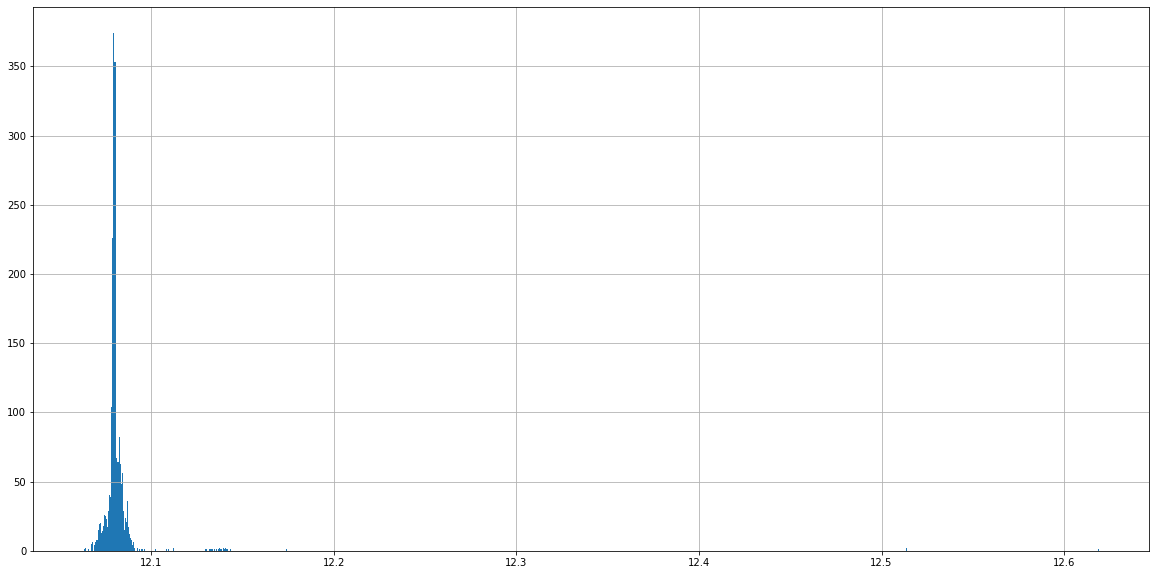

In [36]:
ks3458a_times = ks3458a1_data.index.to_series().diff().dt.total_seconds()
ks3458a_times = ks3458a_times[ks3458a_times < 15]
print(ks3458a_times.describe())
ks3458a_times.hist(bins=1000)

count    1848.000000
mean        7.943800
std         3.982104
min         2.715736
25%         4.434542
50%         6.640016
75%         8.853051
max        19.100210
Name: datetime, dtype: float64


<AxesSubplot:>

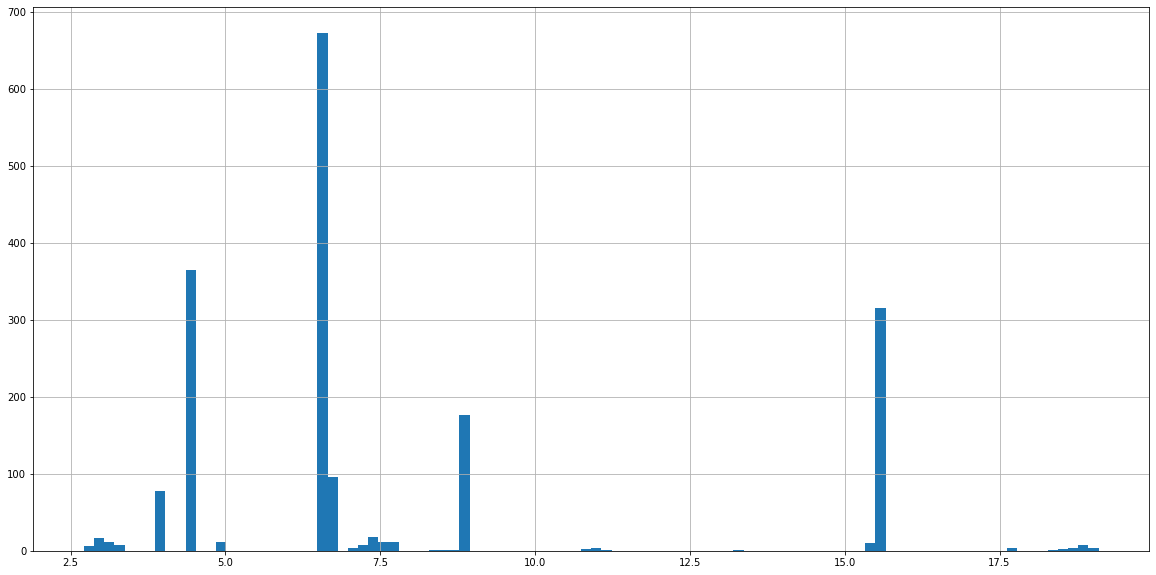

In [38]:
w4920_times = w4920_data.index.to_series().diff().dt.total_seconds()
w4920_times = w4920_times[w4920_times < 60]
print(w4920_times.describe())
w4920_times.hist(bins=100)

count    793.000000
mean      30.206350
std        9.365174
min        4.088641
25%       27.442733
50%       27.473331
75%       40.204909
max       44.450810
Name: datetime, dtype: float64


<AxesSubplot:>

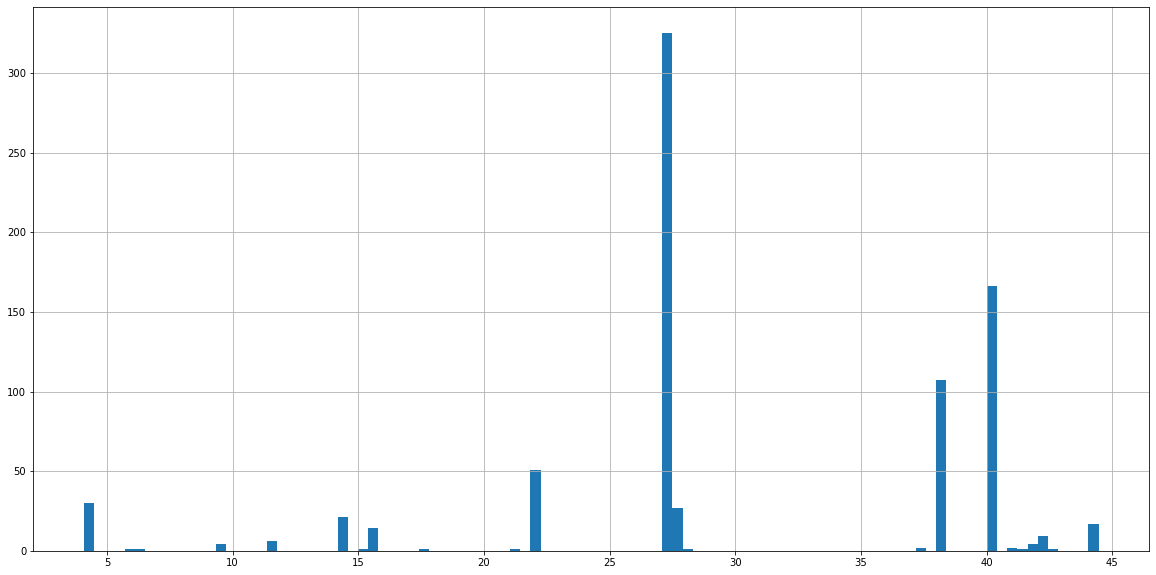

In [39]:
w4950_times = w4950_data.index.to_series().diff().dt.total_seconds()
w4950_times = w4950_times[w4950_times < 60]
print(w4950_times.describe())
w4950_times.hist(bins=100)